# Exercício
## Pré-processamento e Árvores de Decisão
### Alunos (Nome e número usp):
 - Fernanda Tostes Marana (4471070)
 - Matheus Aparecido do Carmo Alves (9791114)
 - Thais Bianchini (9791010)
---

O dataset ["Breast Cancer Wisconsin"](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original) é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio. Valores ausentes são representados pelo caractere '?'

---


### Questão 01.
Carregue o dataset a partir do arquivo fornecido. Depois conte quantos valores ausentes existem para cada atributo.

In [0]:
# Reading the data
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.data', sep=",", header=0)
data

,id,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [0]:
# Counting the missing values
missing_count = 0
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    if not str(data.iloc[i,j]).isnumeric():
      missing_count += 1
      data.iloc[i,j] = float('NaN')
print('Number of missing values:',missing_count)

Number of missing values: 16


---

## Questão 02.

Substitua os valores ausentes utilizando a estratégia de média. 

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initilising the data cleaner
cleaner = SimpleImputer(strategy='mean')
cleaner.fit(data)

# Cleaning the missing values using the mean input strategy
data = pd.DataFrame(cleaner.transform(data))
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


---
## Questão 03.
Separe o conjunto em $80\%$ treino e $20\%$ teste.

In [0]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test set
X_train, X_test, Y_train, Y_test =\
 train_test_split(data.iloc[:,:-1],data.iloc[:,-1], test_size=0.2)
 
print('Train set size:',len(X_train),'(',len(X_train)/data.shape[0],')')
print('Test set size:',len(X_test),'(',len(X_test)/data.shape[0],')')

Train set size: 559 ( 0.7997138769670958 )
Test set size: 140 ( 0.20028612303290416 )


---
## Questão 04.
Treine uma Árvore de Decisão utilizando o método da entropia, no conjunto de treino e extraia a acurácia, precisão e recall no conjunto de teste.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialising the Decision Tree  Classifier
decision_tree = DecisionTreeClassifier( 
            criterion = "entropy") 
  
# Fitting the dataset and performing the classification 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)

# Calculating the evaluation metrics
score = decision_tree.score(X_test, Y_test)
print ("Accuracy : ", score) 

p_score = precision_score(Y_test, Y_pred, average= None)
print ("Precision: ", p_score)

r_score = recall_score(Y_test, Y_pred, average= None)
print ("Recall: ", r_score)

Accuracy :  0.95
Precision:  [0.97916667 0.88636364]
Recall:  [0.94949495 0.95121951]


**EXTRA:**
Apresentando a matriz de confusão (para sumarizar o resultado obtido.

Confusion Matrix:
 [[0.94949495 0.05050505]
 [0.04878049 0.95121951]]


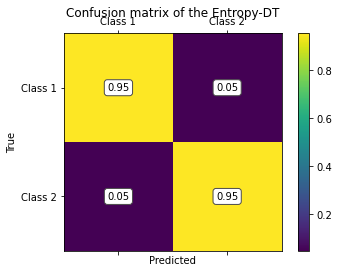

In [0]:
from sklearn.metrics import confusion_matrix
# Plotting a confusion matrix
labels = ['Class 1','Class 2']
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
print('Confusion Matrix:\n',cm)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(cm)
plt.title('Confusion matrix of the Entropy-DT')
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()